# END TO END ML PROJECT - INSY 695 - Enterprise Data Science

# MEDICAL INSURANCE FORCASTING 

**Student: Mesaye Bahiru 260634934**

# Medical Cost 🩺 🏥 ⚕️

<img src="medical insurance.jpg" style= "width:800px;height:800x" />


# 1- Frame The Problem: 


Using, AI and predictive analytics health insurance companies can leverage machine learning for risk management,pricing, and for a deeper understanding of the client. 

The **medical cost** is a cost assoicated with treating diseases, injury, and any other medical expenses. The challenge has been to accurately predict the insurance cost based on personal medical information.

This project analysis provides an insight for insurance companies wanting to determine the factors leading to higher medical costs. 

**Data Dictionary**
* Age: age of the primary beneficiary
* Sex: gender of the primary beneficiary
* BMI: body mass index of primary beneficiary. BMI is calculated weight kg/m^2
* Children: number of children or dependent covered by the health insurance
* Smoker: primary beneficiary smoking
* Region: region of USA (northeast, southeast, southwest, northwest) where the beneficiary reside
* Charges: the medical cost of primary beneficiary billed by health insurance




# 2- Data Acquisition 

In [1]:
# import libraries
import pandas as pd
import numpy as np
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import plot, iplot, init_notebook_mode
plt.style.use('ggplot')
%matplotlib inline



import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter("ignore", UserWarning)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


# regression models
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.pipeline import Pipeline # for using pipeline
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.linear_model import Ridge # for ridge regression
from sklearn.ensemble import RandomForestRegressor # for random forest regression
from sklearn.linear_model import LinearRegression # linear regression
from sklearn.ensemble import GradientBoostingRegressor # gradient boosting regressor


# hyptertuning
from sklearn.model_selection import GridSearchCV# fine tuning model

# extra
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter

In [2]:
# load the data
df = pd.read_csv("insurance.csv")


In [3]:
df.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

# 3- Data Exploration Analysis

## A. Data Exploration

In [4]:
df.shape

(1338, 7)

In [5]:
# checking missing values   

def missing_values(df):
    miss_val = df.isnull().sum()
    miss_val_percent = 100 * df.isnull().sum() / len(df)
    miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)
    miss_val_table_columns = miss_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    return miss_val_table_columns


miss_values = missing_values(df)
miss_values.head(20)
 

Missing Values  % of Total Values
age                    0                0.0
sex                    0                0.0
bmi                    0                0.0
children               0                0.0
smoker                 0                0.0
region                 0                0.0
charges                0                0.0

In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.dtypes.value_counts().sort_values()

float64    2
int64      2
object     3
dtype: int64

Text(0, 0.5, 'Data type')

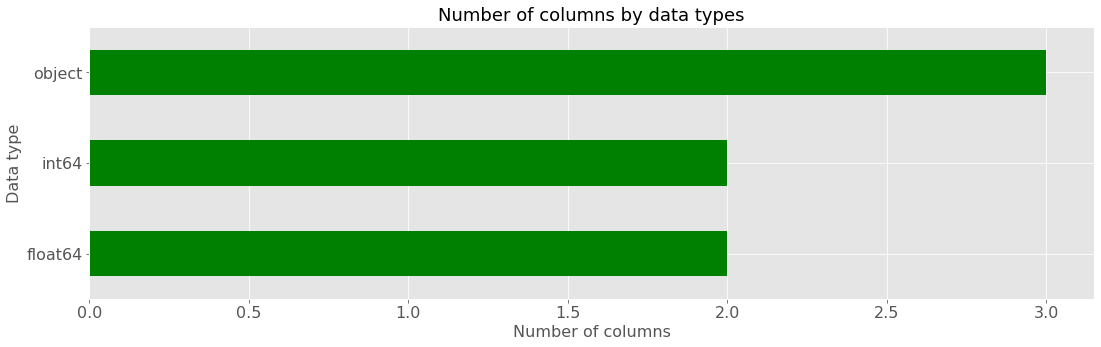

In [9]:
df.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(18, 5),
                                            fontsize=16,
                                           color="green")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

In [10]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [11]:
# for googlecolab
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 


In [12]:
#Generate a HTML report
import pandas_profiling
profile = df.profile_report(title='Pandas Profiling Report')
#profile

profile.to_file(output_file="profile_report_output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# B. Data Visualization 

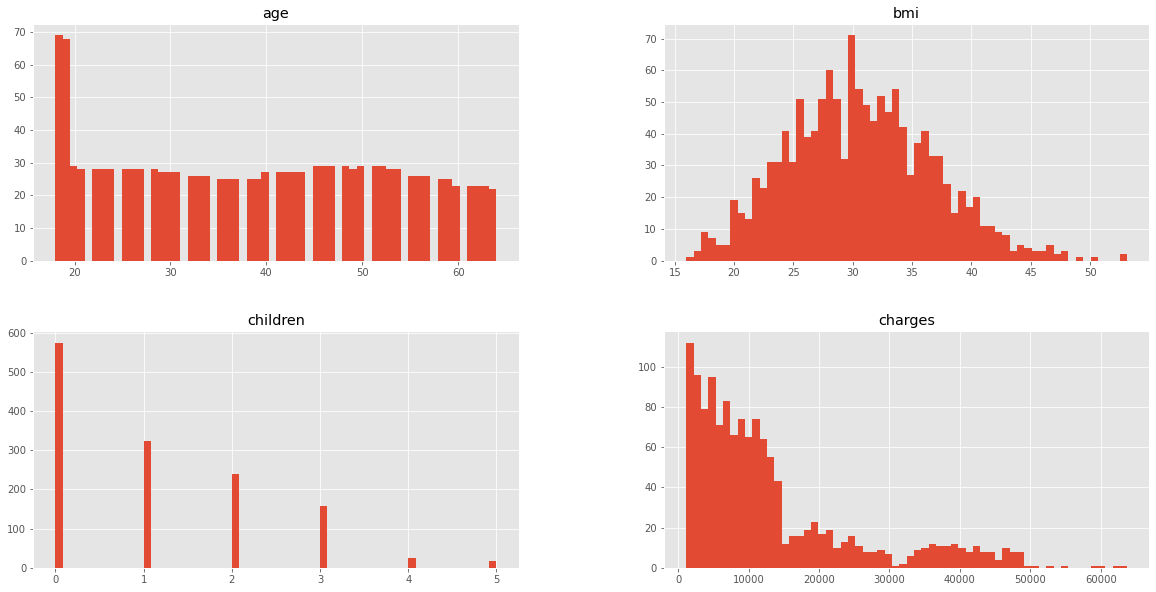

In [13]:
%matplotlib inline

df.hist(bins=60, figsize=(20,10))
plt.show()

<AxesSubplot:>

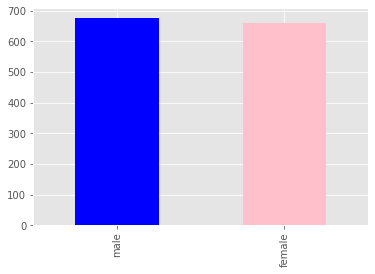

In [14]:
# check the sex distribution of the primary beneficiary 
df.sex.value_counts().plot.bar(color=["blue","pink"])


<AxesSubplot:>

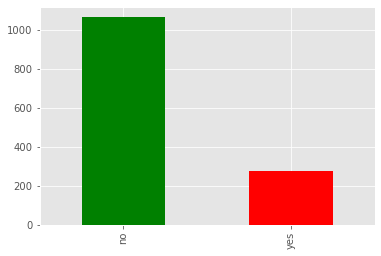

In [15]:
# count the number of smokers and non smokers
df.smoker.value_counts().plot.bar(color=["green","red"])


<AxesSubplot:>

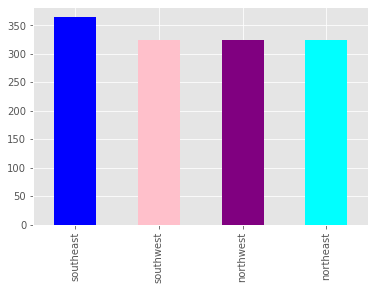

In [16]:
# the regions where the primary beneficiary reside

df.region.value_counts().plot.bar(color=["blue","pink","purple","cyan"])

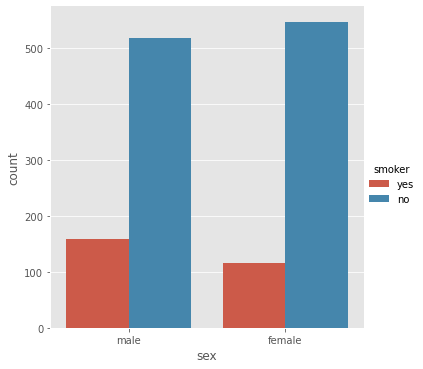

In [17]:
# smokers distirbution by sex
sns.catplot(x="sex", kind='count',hue='smoker', data=df[['sex', 'smoker']], order=['male','female'])

<AxesSubplot:>

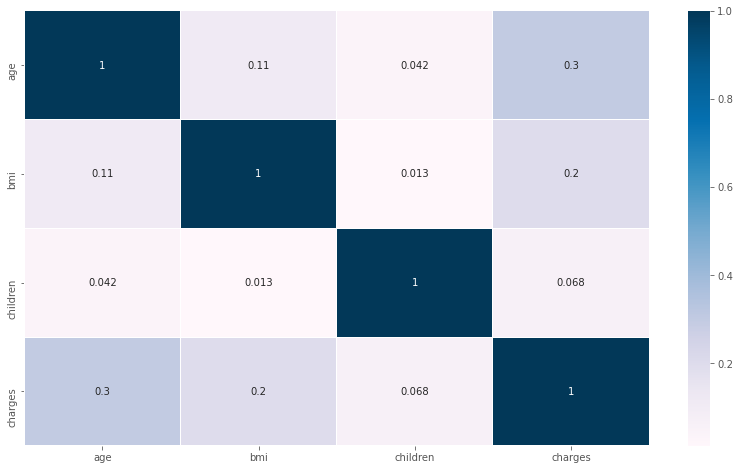

In [18]:
# correlation heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot = True,  linewidths=.05, cmap="PuBu")



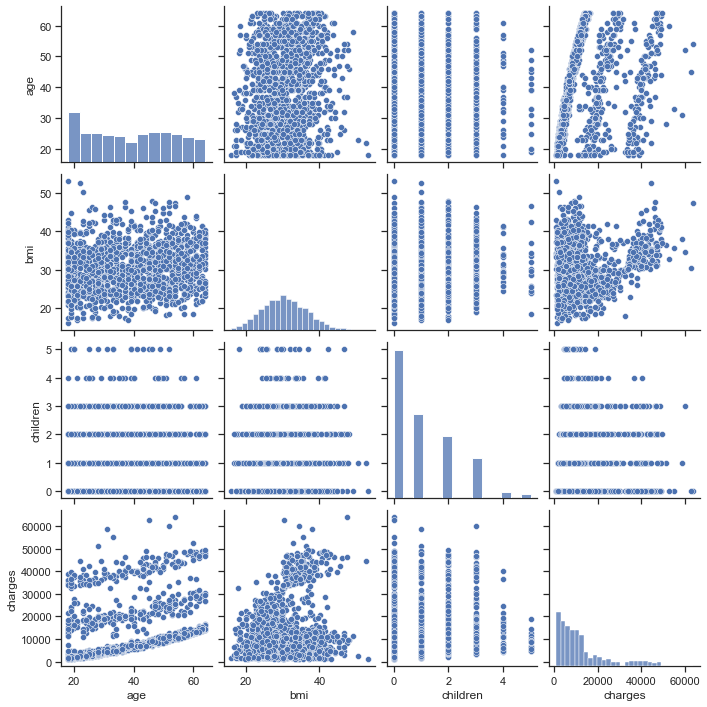

In [19]:
# pairplot obeservation of data
sns.set(style="ticks")

sns.pairplot(df)


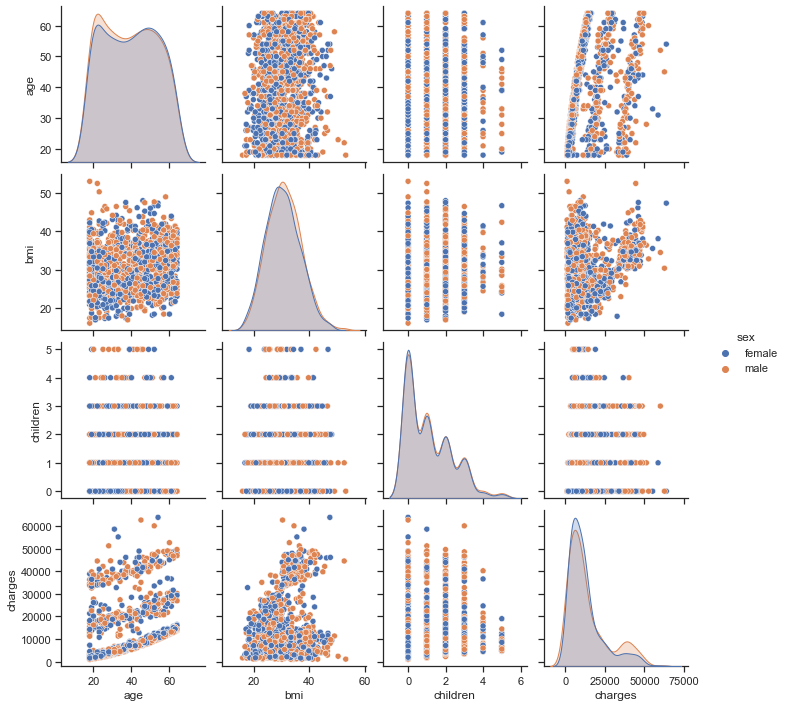

In [20]:
sns.set(style="ticks")

sns.pairplot(df, hue= "sex")


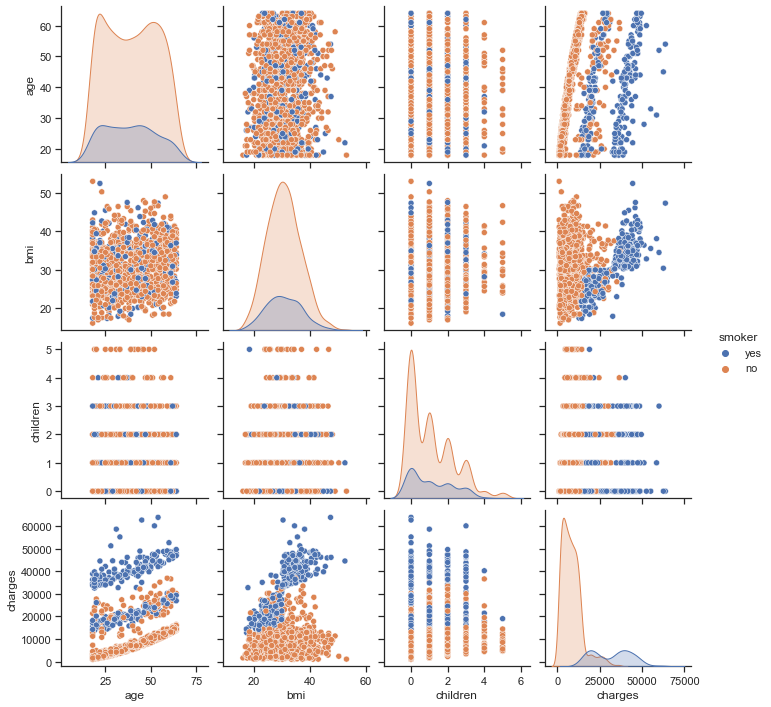

In [21]:
sns.set(style="ticks")

sns.pairplot(df, hue="smoker")


In [22]:
# Plotting 3-D  {age, charges, bmi}

fig = px.scatter_3d(df, x="age", y="charges", z="bmi", color="smoker")
fig.show()

#### INSIGHT: The insurance cost of primary benficiary increases with an increase in body mass index (bmi) and age  

In [23]:
# the insurance cost by region and sex 

plot_df = df.groupby(['region','sex','smoker'])['charges'].mean()

plot_df = plot_df.rename('charges').reset_index()
fig = px.bar(plot_df, x='region', y='charges', color='sex', height=800,
             title="Average Insurance Costs by Region and Smoking Status",
             color_discrete_map={'Female': '#BFC5DA','Male': '#5D6A92'}, 
             facet_row='smoker', text='charges', opacity=0.85, barmode='group')

fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside', 
                  marker_line=dict(width=1, color='#303030'))

fig.layout.yaxis2.update(matches=None)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(title="Region", row=1)

fig.update_yaxes(title="Claim Amount, $",  gridcolor='#E3E3E3', zeroline=True, zerolinewidth=2, 
                 showgrid=False, zerolinecolor='#E5E5EA',
                 showline=True, linecolor='#E5E5EA', linewidth=2)

fig.update_layout(font_color="#303030", paper_bgcolor="white", plot_bgcolor="white",
                  bargroupgap=0.05, bargap=0.2,
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""))
fig.show()

In [24]:
# check the insurance cost by sex
px.scatter(df, x = 'charges', color = 'sex', title='Distribution of charges',height=700)



In [25]:
# insurance cost distribution between smokers and non smokers
fig=px.histogram(df, x='charges', color='smoker', opacity=0.7, barmode='overlay',
                 histnorm='probability density', 
                 title="Distribution of Insurance Costs by Smoking Status",
                 color_discrete_sequence=['#636EFA','#FECB52']) 

fig.show()


# 4- Data Preparation

In [26]:
# one hot encoding

df= pd.get_dummies(df, columns =["sex","region","smoker"])


In [27]:
df.head(5)

age     bmi  children      charges  sex_female  sex_male  region_northeast  \
0   19  27.900         0  16884.92400           1         0                 0   
1   18  33.770         1   1725.55230           0         1                 0   
2   28  33.000         3   4449.46200           0         1                 0   
3   33  22.705         0  21984.47061           0         1                 0   
4   32  28.880         0   3866.85520           0         1                 0   

   region_northwest  region_southeast  region_southwest  smoker_no  smoker_yes  
0                 0                 0                 1          0           1  
1                 0                 1                 0          1           0  
2                 0                 1                 0          1           0  
3                 1                 0                 0          1           0  
4                 1                 0                 0          1           0

<AxesSubplot:>

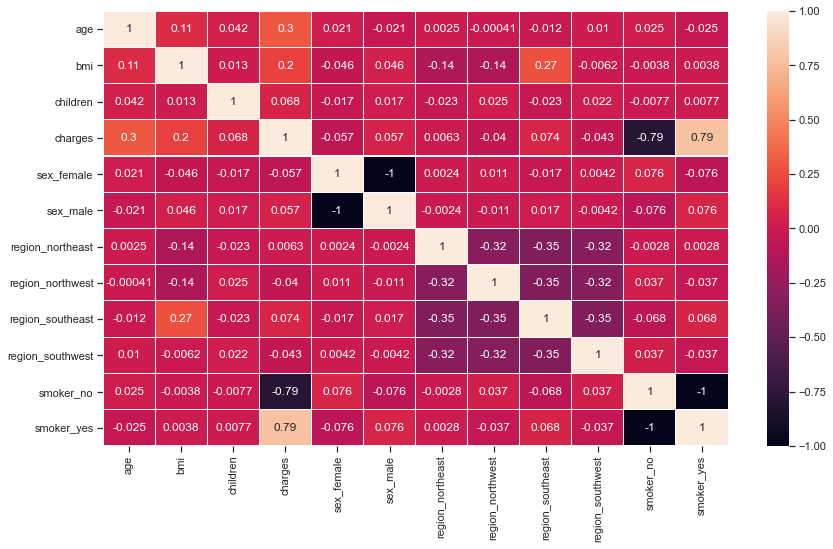

In [28]:
# check correlation using heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot = True,  linewidths=.05) 


In [29]:
# another way to see correlation in traind data
corr_matrix = df.corr()

cor_list = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
cor_list

charges           smoker_yes          0.787251
age               charges             0.299008
bmi               region_southeast    0.270025
                  charges             0.198341
age               bmi                 0.109272
                                        ...   
region_northwest  region_southeast   -0.346265
region_southeast  region_southwest   -0.346265
charges           smoker_no          -0.787251
smoker_no         smoker_yes         -1.000000
sex_female        sex_male           -1.000000
Length: 66, dtype: float64

In [30]:
# remove negatively correlated variables such as sex_female(-1) and smoker_no(-1)

df= df.drop(["sex_female","smoker_no"], axis=1)

Text(0, 0.5, 'Values')

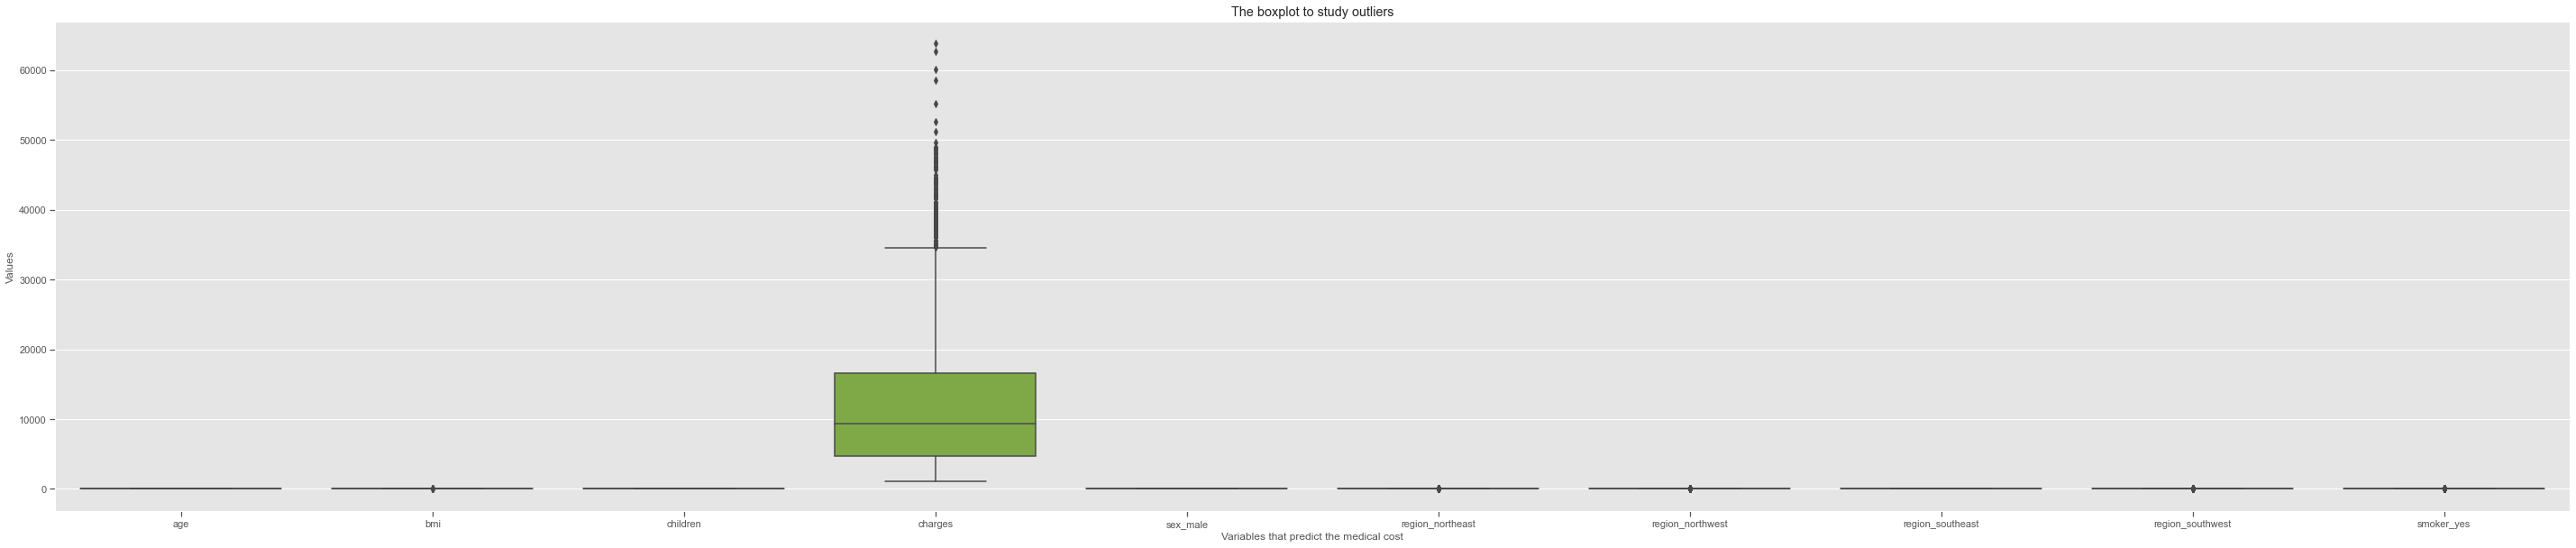

In [31]:
# outliers check
plt.style.use('ggplot')


plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the medical cost')
plt.ylabel('Values')

In [32]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(df)
score = iforest.decision_function(df)

from numpy import where
anom_index = where(pred== -1)
values = df.iloc[anom_index]
values

age     bmi  children      charges  sex_male  region_northeast  \
55     58  36.955         2  47496.49445         1                 0   
94     64  31.300         2  47291.05500         0                 0   
128    32  17.765         2  32734.18630         0                 0   
175    63  37.700         0  48824.45000         0                 0   
185    36  41.895         3  43753.33705         1                 1   
250    18  17.290         2  12829.45510         1                 1   
251    63  32.200         2  47305.30500         0                 0   
281    54  40.565         3  48549.17835         1                 1   
288    59  36.765         1  47896.79135         0                 1   
328    64  33.800         1  47928.03000         0                 0   
330    61  36.385         1  48517.56315         0                 1   
543    54  47.410         0  63770.42801         0                 0   
577    31  38.095         1  58571.07448         0                 1   
674    44  43.890         2  46200.98510         0                 0   
725    30  39.050         3  40932.42950         0                 0   
819    33  35.530         0  55135.40209         0                 0   
860    37  47.600         2  46113.51100         0                 0   
883    51  37.050         3  46255.11250         0                 1   
1012   61  33.330         4  36580.28216         0                 0   
1047   22  52.580         1  44501.39820         1                 0   
1085   39  18.300         5  19023.26000         0                 0   
1096   51  34.960         2  44641.19740         0                 1   
1122   53  36.860         3  46661.44240         0                 0   
1124   23  42.750         1  40904.19950         0                 1   
1186   20  35.625         3  37465.34375         1                 0   
1230   52  34.485         3  60021.39897         1                 0   
1301   62  30.875         3  46718.16325         1                 0   

      region_northwest  region_southeast  region_southwest  smoker_yes  
55                   1                 0                 0           1  
94                   0                 0                 1           1  
128                  1                 0                 0           1  
175                  0                 0                 1           1  
185                  0                 0                 0           1  
250                  0                 0                 0           1  
251                  0                 0                 1           1  
281                  0                 0                 0           1  
288                  0                 0                 0           1  
328                  0                 0                 1           1  
330                  0                 0                 0           1  
543                  0                 1                 0           1  
577                  0                 0                 0           1  
674                  0                 1                 0           1  
725                  0                 1                 0           1  
819                  1                 0                 0           1  
860                  0                 0                 1           1  
883                  0                 0                 0           1  
1012                 0                 1                 0           0  
1047                 0                 1                 0           1  
1085                 0                 0                 1           1  
1096                 0                 0                 0           1  
1122                 1                 0                 0           1  
1124                 0                 0                 0           1  
1186                 1                 0                 0           1  
1230                 1                 0                 0           1  
1301              

In [33]:
# there were 27 outiliers detected

values.shape

(27, 10)

In [34]:
df = df[~df.index.isin(values.index)]
df.shape

(1311, 10)

# feature selection

In [35]:
from sklearn.model_selection import train_test_split
# define x and y

X, y = df.drop(['charges'], axis=1), df.charges

# split the data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)



In [36]:
# check which features are least important
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor()

model = randomforest.fit(X_train,y_train)

model.feature_importances_

pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)), columns = ['predictor','feature importance']).sort_values("feature importance")

predictor  feature importance
7  region_southwest            0.002513
5  region_northwest            0.003970
6  region_southeast            0.004434
3          sex_male            0.005182
4  region_northeast            0.006511
2          children            0.015751
0               age            0.153029
1               bmi            0.188210
8        smoker_yes            0.620402

region_southwest scored the lowest feature importance and it should be dropped from the analysis

In [37]:
X_train = X_train.drop(['region_southwest'], axis=1)


In [38]:
X_test= X_test.drop(['region_southwest'], axis=1)



In [39]:
# standarize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc= scaler.fit_transform(X_test)

# 5- Modeling

In [40]:
# build regression model

In [41]:
from sklearn.linear_model import LinearRegression


regressor_linear = LinearRegression()
regressor_linear.fit(X_train_sc, y_train)

# Predicting 
y_pred = regressor_linear.predict(X_test_sc)    
# Evaluate  accuracy on the test set


print("R-squared: ",regressor_linear.score(X_test_sc,y_test))

# Calculate the MSE
from sklearn.metrics import mean_squared_error
print("mse: ", mean_squared_error(y_test , y_pred))




R-squared:  0.6460409452945324
mse:  53829621.13655913


In [42]:
# build random forest  model

rand = RandomForestRegressor()
rand.fit(X_train_sc, y_train)

# Predicting 
y_pred_rand = rand.predict(X_test_sc) 

print("R-squared: ", rand.score(X_test_sc, y_test))
print("mse: ", mean_squared_error(y_test , y_pred_rand))



R-squared:  0.761168190201974
mse:  36321223.22025147


In [43]:
# build gradient boosting model

In [44]:
gr = GradientBoostingRegressor()
gr.fit(X_train_sc, y_train)

# Predicting 
y_pred_gr = gr.predict(X_test_sc) 


print("R-squared: ",gr.score(X_test_sc, y_test))
print("mse: ", mean_squared_error(y_test , y_pred_gr))



R-squared:  0.7611420736300989
mse:  36325194.99368326


In [45]:
# Ridge regression

In [46]:
from sklearn.linear_model import Ridge

In [47]:
rg = Ridge(alpha= 0.1)# apply regularization 
rg.fit(X_train_sc, y_train)

# Predicting 
y_test_rg = rg.predict(X_test_sc)


print("R-squared: ", rg.score(X_test_sc,y_test))
print("mse: ", mean_squared_error(y_test , y_test_rg))



R-squared:  0.6460388746541954
mse:  53829936.036780976


# Model Summary

In [48]:
model_comparison= pd.DataFrame({"Model":["Linear Regression","Random Forest","Gradient Boosting","Ridge Regression"],
                               "R-squared":[regressor_linear.score(X_test_sc,y_test),rand.score(X_test_sc, y_test),gr.score(X_test_sc, y_test),rg.score(X_test_sc,y_test)]})

model_comparison

Model  R-squared
0  Linear Regression   0.646041
1      Random Forest   0.761168
2  Gradient Boosting   0.761142
3   Ridge Regression   0.646039

In [49]:
mse_comparsion= pd.DataFrame({"Model":["Linear Regression","Random Forest","Gradient Boosting","Ridge Regression"],
                            "Mean Squared Error":[mean_squared_error(y_test , y_pred),mean_squared_error(y_test , y_pred_rand),
                                                  mean_squared_error(y_test , y_pred_gr),mean_squared_error(y_test , y_test_rg)]})
mse_comparsion

Model  Mean Squared Error
0  Linear Regression        5.382962e+07
1      Random Forest        3.632122e+07
2  Gradient Boosting        3.632519e+07
3   Ridge Regression        5.382994e+07

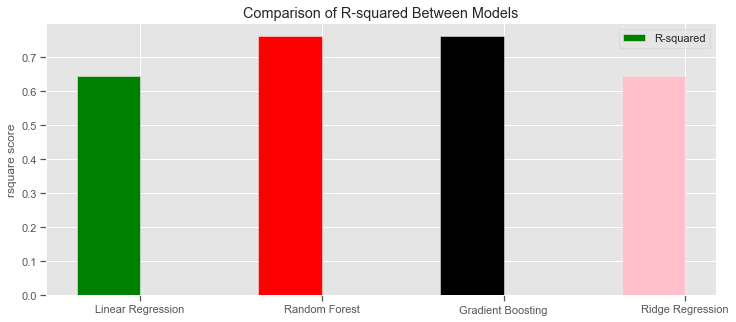

In [50]:

plt.style.use('ggplot')


labels = model_comparison['Model']
rsquare = model_comparison['R-squared']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,5))
bar1 = ax.bar(x - width/2, rsquare, width, label='R-squared', color=['green',"red","black","pink"])

ax.set_ylabel('rsquare score')
ax.set_title('Comparison of R-squared Between Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

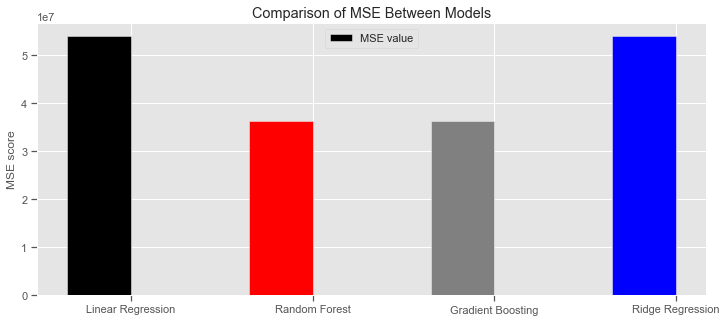

In [51]:
plt.style.use('ggplot')

labels = mse_comparsion['Model']
mse = mse_comparsion['Mean Squared Error']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,5))
bar1 = ax.bar(x - width/2, mse, width,  color=['black',"red","grey","blue"])

ax.set_ylabel('MSE score')
ax.set_title('Comparison of MSE Between Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(["MSE value"],loc=9)

In [52]:
# converting array into dataframe

train_X = X_train
cols = list(train_X)

X_train_sc=pd.DataFrame(X_train_sc)
X_train_sc.columns=cols

#Renaming column name of Target variable
y_train=pd.DataFrame(y_train)
y_train.columns = ['charges']
scaled_train_df = pd.concat([X_train_sc,y_train], axis=1)
scaled_train_df.head(3)




age       bmi  children  sex_male  region_northeast  region_northwest  \
0 -0.666531 -1.445476 -0.040180  -1.01927          1.810401         -0.572943   
1 -1.452836  0.698422  0.801991  -1.01927         -0.552364         -0.572943   
2  0.334220  1.077450 -0.040180  -1.01927         -0.552364          1.745374   

   region_southeast  smoker_yes     charges  
0         -0.617061   -0.470580  16884.9240  
1         -0.617061    2.125039   1725.5523  
2         -0.617061   -0.470580   4449.4620

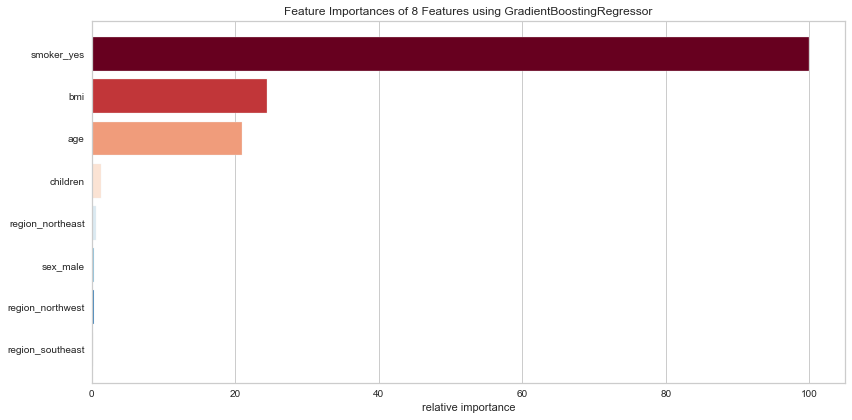

<AxesSubplot:title={'center':'Feature Importances of 8 Features using GradientBoostingRegressor'}, xlabel='relative importance'>

In [53]:
# determine the feature importances
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(12, 6))
viz = FeatureImportances(gr, labels=X_train_sc.columns, colormap='RdBu_r', rotation=180)
viz.fit(X_train_sc, y_train)
viz.poof()

### Top 3 three feature 

#### (smoke_yes, bmi,  age)

# Model Selection and Fin-Tuning

In [54]:
# hyyperparameter tuning using random forest, gradient boosting and ridge models


rf = RandomForestRegressor()

gbr = GradientBoostingRegressor()

rg= Ridge()

#Putting models in a list 
regressors = [('Random Forest Regressor', rf),("Gradient Boosting",gbr),
              ("Ridge Regression", rg)]



In [55]:
def tuning(model_name, parameters):
    #GridSearch and Cross Validation
    grid = GridSearchCV(estimator= model_name,
                       param_grid= parameters,
                       scoring= 'r2',
                       cv= 10,
                       n_jobs=-1)
    
    
    #Fitting
    grid.fit(X_train_sc, y_train)
    
    
    #Extract best hyperparameters from grid_dt
    best_hyperparams = grid.best_params_
    print("Best hyperparameters:\n", best_hyperparams)

    # Extract best model from 'grid_dt'
    best_model = grid.best_estimator_
    
    
    
    #Evaluate test set accuracy
    test_acc = best_model.score(X_test_sc,y_test)
    print("Test accuracy of the best model (tuned):\n {:.3f}".format(test_acc))


In [56]:
#Getting the parameters of models
for regressor_name, model in regressors:
    print("The parameters of {:s} are the following:".format(regressor_name))
    print(model.get_params())
    print("-" *50)# line divider

The parameters of Random Forest Regressor are the following:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
--------------------------------------------------
The parameters of Gradient Boosting are the following:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction'

In [57]:

#Random Forests Regressor
params_rf = {'max_depth':[5,6,7],'n_estimators':[400,500,600]}

#GradientBoostingRegressor
params_gbr =  {'n_estimators':[100,200,300,400],'learning_rate':[0.01,0.025,0.05], 
               'min_samples_split':[0.01,0.025,0.05]}
#Ridge regression
params_rg = {"alpha": [1, 0.10, 0.001, 0.0001, 500],
              "fit_intercept": [True, False],
              "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

In [58]:


print("Random Forests Regressor:")
tuning(rf, params_rf)
print("-" *50)


print('GradientBoosting Regressor:')
tuning(gbr, params_gbr)
print("-" *50)


print('GradientBoosting Regressor:')
tuning(rg, params_rg)
print("-" *50)

Random Forests Regressor:
Best hyperparameters:
 {'max_depth': 5, 'n_estimators': 600}
Test accuracy of the best model (tuned):
 0.769
--------------------------------------------------
GradientBoosting Regressor:
Best hyperparameters:
 {'learning_rate': 0.05, 'min_samples_split': 0.05, 'n_estimators': 100}
Test accuracy of the best model (tuned):
 0.771
--------------------------------------------------
GradientBoosting Regressor:
Best hyperparameters:
 {'alpha': 1, 'fit_intercept': True, 'solver': 'cholesky'}
Test accuracy of the best model (tuned):
 0.646
--------------------------------------------------


### Gradient Boosting regressor provides highest r-squared with 77.1 % 

# Prediction !!!



In [59]:
## prediciton!!!
# young and healthy client
pr1= gr.predict([[28,# age 
                 18,# bmi
                 1, # children
                 1, # male
                 1, #region_northeast
                 0, #region_northwest
                 0, #region_southeast
                 0 ]])#smoke_yes

print("The insurance cost : ", pr1)

The insurance cost :  [15739.67764824]


In [60]:
## prediciton!!!
# old and prone to disease client
pr2= gr.predict([[58,# age 
                 25,# bmi
                 3, # children
                 1, # male
                 1, #region_northeast
                 0, #region_northwest
                 0, #region_southeast
                 1]])#smoke_yes

print("The insurance cost : ", pr2)

The insurance cost :  [49799.16971585]


In [61]:
pr_df= pd.DataFrame({"client":[1,2],"cost":[(pr1),(pr2)]})

In [62]:
pr_df

client                 cost
0       1  [15739.67764824453]
1       2   [49799.1697158545]

# Causal Inference 📚 🧑🏻‍💻 Individual Assignment -2

In [63]:
%load_ext autoreload
%autoreload 2

In [64]:
from causalml.inference.meta import LRSRegressor


In [65]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from xgboost import XGBRegressor
import warnings
from lightgbm import LGBMRegressor
import time
from sklearn.inspection import permutation_importance


from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset import *
from causalml.metrics import *

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

In [66]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'smoker_yes'],
      dtype='object')

In [67]:
# define y, X and w(treatment)

y= df["charges"]

X= df[['age','bmi', 'children','sex_male','region_northeast','region_northwest','region_southeast']]

w= df["smoker_yes"]

y, X, w = y, X, w




In [68]:
w_multi = np.array(['treatment_A' if x==1 else 'control' for x in w])


In [69]:
feature_names = ['age','bmi', 'children','sex_male','region_northeast','region_northwest','region_southeast']

model_tau = LGBMRegressor(importance_type='gain')  # specify model for model_tau



# 1) Causal Interpreatations

# S Learner 


In [70]:
base_algo = LGBMRegressor()

slearner = BaseSRegressor(base_algo, control_name='control')

slearner.estimate_ate(X, w_multi, y)

array([23135.86555359])

In [71]:
slearner_tau = slearner.fit_predict(X, w_multi, y)


# Feature Importance (method = auto)


In [72]:
slearner.get_importance(X=X, 
                        tau=slearner_tau,
                        normalize=True, 
                        method='auto', 
                        features=feature_names)


{'treatment_A': bmi                 0.970294
 age                 0.018128
 children            0.006686
 region_northeast    0.002657
 sex_male            0.001036
 region_northwest    0.000684
 region_southeast    0.000515
 dtype: float64}

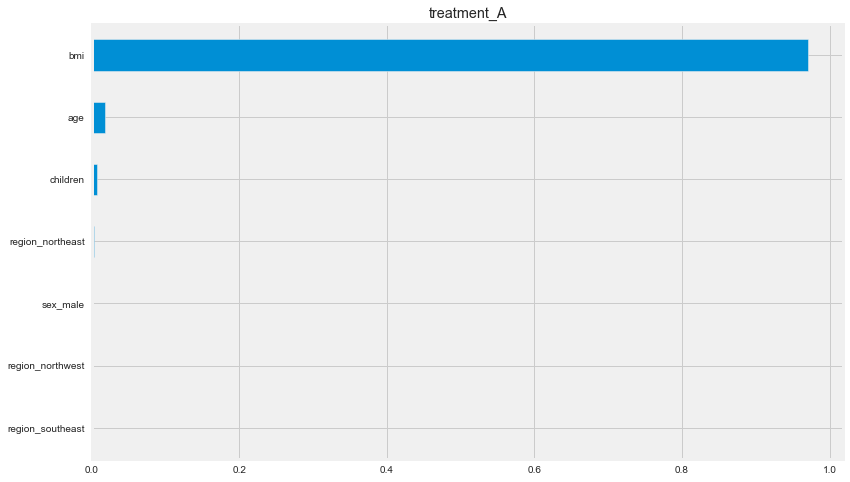

In [73]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

# Feature Importance (method = permutation)


In [74]:
slearner.get_importance(X=X, 
                        tau=slearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)


{'treatment_A': bmi                 2.019260
 age                 0.037747
 children            0.022284
 region_northeast    0.008302
 region_northwest    0.003113
 sex_male            0.002547
 region_southeast    0.000237
 dtype: float64}

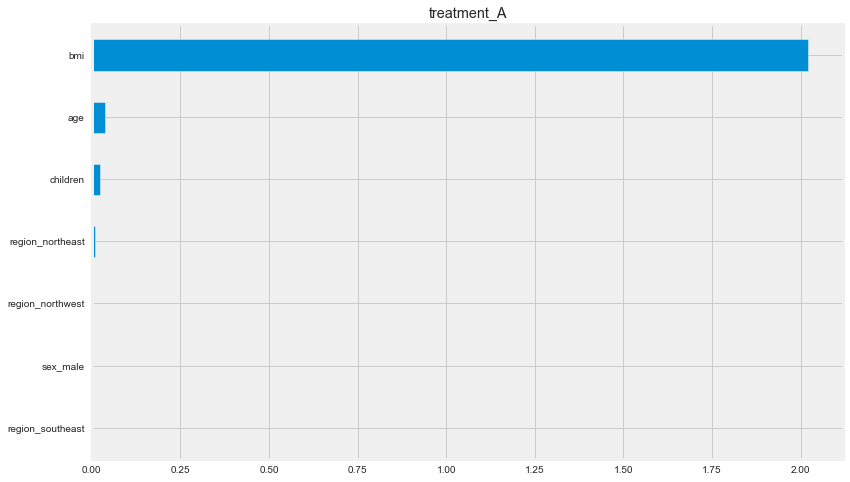

In [75]:
slearner.plot_importance(X=X, 
                         tau=slearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

# Feature Importance (sklearn.inspection.permutation_importance)


In [76]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, slearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)


print("Elapsed time: %s seconds" % (time.time() - start_time))


Elapsed time: 1.1042559146881104 seconds


In [77]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)


bmi                 2.019260
age                 0.037747
children            0.022284
region_northeast    0.008302
region_northwest    0.003113
sex_male            0.002547
region_southeast    0.000237
dtype: float64

Text(0.5, 1.0, 'Test Set Permutation Importances')

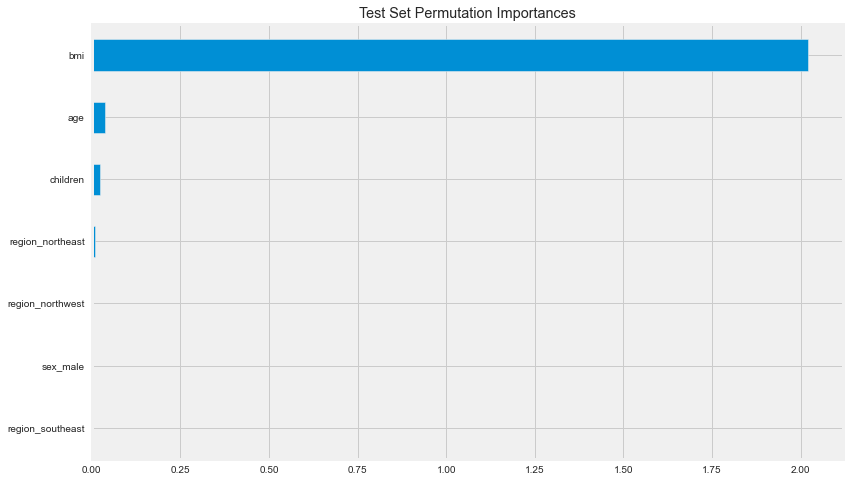

In [78]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

# Shapley Values


In [79]:
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)
shap_slearner


{'treatment_A': array([[-2.92151592e+02, -9.28132275e+03,  1.08394977e+03, ...,
          1.20237564e+02,  4.45977350e+01,  5.69961497e+00],
        [-9.73704596e+02,  8.23450955e+03,  7.75750391e+01, ...,
          3.18699647e+02,  9.89220892e+01, -8.28500345e+01],
        [ 6.97125131e+02,  8.42829797e+03, -1.22223584e+02, ...,
          4.03889870e+02,  3.30988601e+02, -1.92378668e+02],
        ...,
        [ 8.83893836e+01,  9.77485901e+03,  1.10642337e+03, ...,
          3.15282469e+02,  1.27326141e+02, -4.58357312e+01],
        [ 1.18379875e+03, -8.62838073e+03,  1.11738612e+03, ...,
          1.38260814e+02,  6.29441952e+01,  1.82911326e+01],
        [-7.79640677e+02, -7.08081223e+03,  5.52448625e+02, ...,
          1.38526803e+02, -1.12002473e+02,  1.50231577e+01]])}

In [80]:
np.mean(np.abs(shap_slearner['treatment_A']),axis=0)


array([ 747.24262839, 9436.10582056,  614.74177981,  213.06237537,
        342.04197228,  148.93488586,   40.79381286])

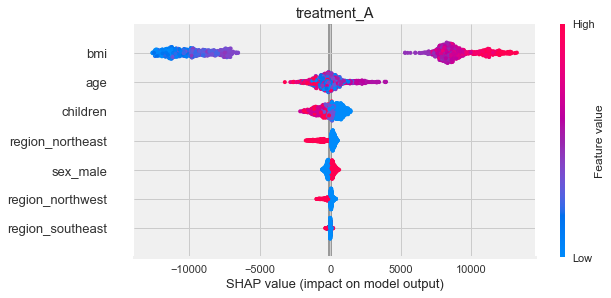

In [81]:
# Plot shap values without specifying shap_dict
slearner.plot_shap_values(X=X, tau=slearner_tau, features=feature_names)

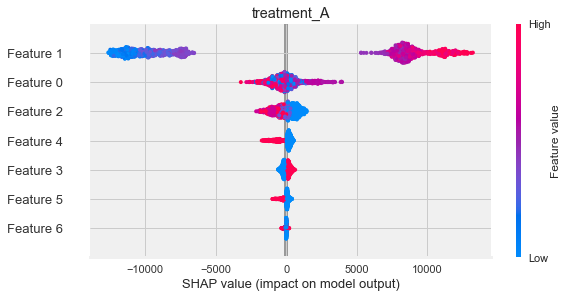

In [82]:
# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner)

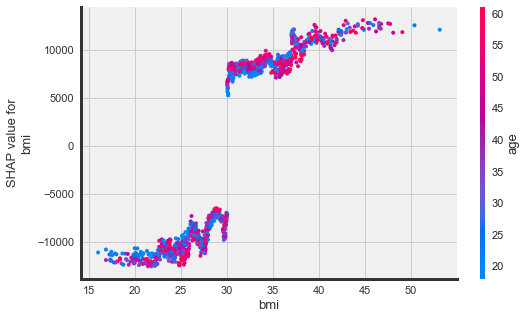

In [83]:
# interaction_idx set to 'auto' (searches for feature with greatest approximate interaction)
# specify feature names
slearner.plot_shap_dependence(treatment_group='treatment_A',
                              feature_idx='bmi',
                              X=X,
                              tau=slearner_tau,
                              interaction_idx='auto',
                              shap_dict=shap_slearner,
                              features=feature_names)

# T learner

In [84]:
tlearner = BaseTRegressor(LGBMRegressor(), control_name='control')
tlearner.estimate_ate(X, w_multi, y)

(array([23243.20004301]), array([22618.84090962]), array([23867.55917641]))

In [85]:
tlearner_tau = tlearner.fit_predict(X, w_multi, y)


# Feature Importance (method = auto)


In [86]:
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        normalize=True, 
                        method='auto', 
                        features=feature_names)


{'treatment_A': bmi                 0.956978
 age                 0.026707
 children            0.007452
 region_northeast    0.003934
 sex_male            0.002860
 region_northwest    0.001046
 region_southeast    0.001023
 dtype: float64}

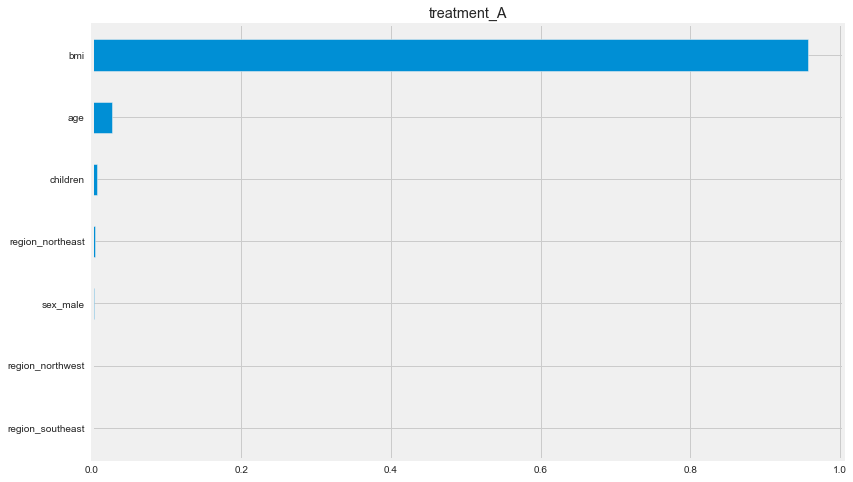

In [87]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

# Feature Importance (method = permutation)


In [88]:
tlearner.get_importance(X=X, 
                        tau=tlearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)


{'treatment_A': bmi                 1.971323
 age                 0.049992
 children            0.026620
 region_northeast    0.010205
 sex_male            0.007363
 region_northwest    0.005712
 region_southeast    0.001410
 dtype: float64}

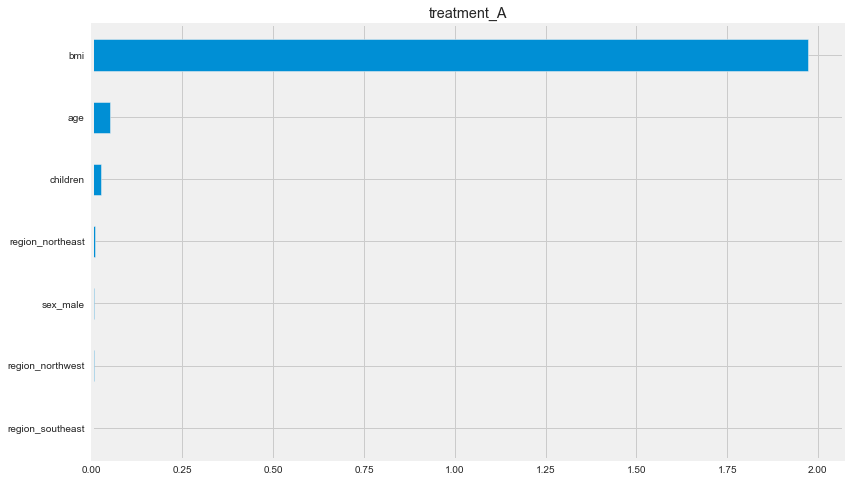

In [89]:
tlearner.plot_importance(X=X, 
                         tau=tlearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

# Feature Importance (sklearn.inspection.permutation_importance)


In [90]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, tlearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))


Elapsed time: 0.270596981048584 seconds


In [91]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)


bmi                 1.971323
age                 0.049992
children            0.026620
region_northeast    0.010205
sex_male            0.007363
region_northwest    0.005712
region_southeast    0.001410
dtype: float64

# Shapley Values


In [92]:
shap_tlearner = tlearner.get_shap_values(X=X, tau=tlearner_tau)
shap_tlearner


{'treatment_A': array([[ -689.57308263, -9734.78105773,   968.65602127, ...,
           100.53250932,   169.76253475,   -91.55125542],
        [-1092.12339947,  8156.7312222 ,   250.84180848, ...,
           290.68488573,   177.54304406,    35.92091614],
        [  552.87802174,  8448.63102451,   265.77043793, ...,
           394.44181367,   294.47444677,   -99.23263424],
        ...,
        [   37.19163307,  9883.13456445,   809.37235713, ...,
           372.92371539,   286.03993689,   -77.94532421],
        [ 1200.04465396, -8298.82832291,  1179.02758313, ...,
           157.60365304,   259.70283547,    18.05917936],
        [-1123.35552774, -7225.45525539,   522.59747219, ...,
           152.18778478,   -83.30125454,   -13.47784185]])}

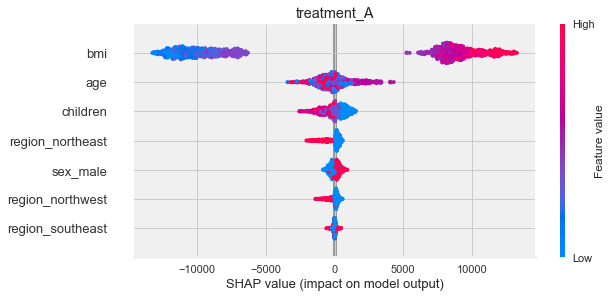

In [93]:
# Plot shap values without specifying shap_dict
tlearner.plot_shap_values(X=X, tau=tlearner_tau, features=feature_names)

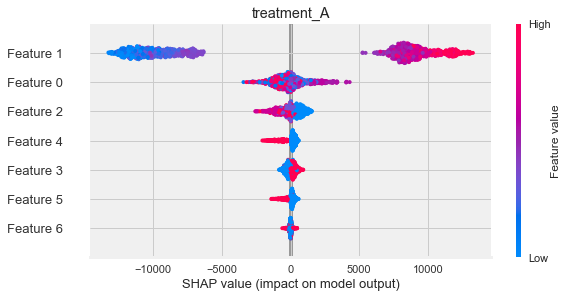

In [94]:
# Plot shap values WITH specifying shap_dict
tlearner.plot_shap_values(X=X, shap_dict=shap_tlearner)

# X Learner


In [95]:
xlearner = BaseXRegressor(LGBMRegressor(), control_name='control')
xlearner.estimate_ate(X, w_multi, y)


(array([23409.78065797]), array([22796.25244522]), array([24023.30887072]))

In [96]:
xlearner_tau = xlearner.predict(X, w_multi, y)


# Feature Importance (method = auto)


In [97]:
xlearner.get_importance(X=X, 
                        tau=xlearner_tau, 
                        normalize=True, 
                        method='auto', 
                        features=feature_names)



{'treatment_A': bmi                 0.975570
 age                 0.016090
 children            0.005603
 region_northeast    0.001499
 sex_male            0.000910
 region_southeast    0.000290
 region_northwest    0.000038
 dtype: float64}

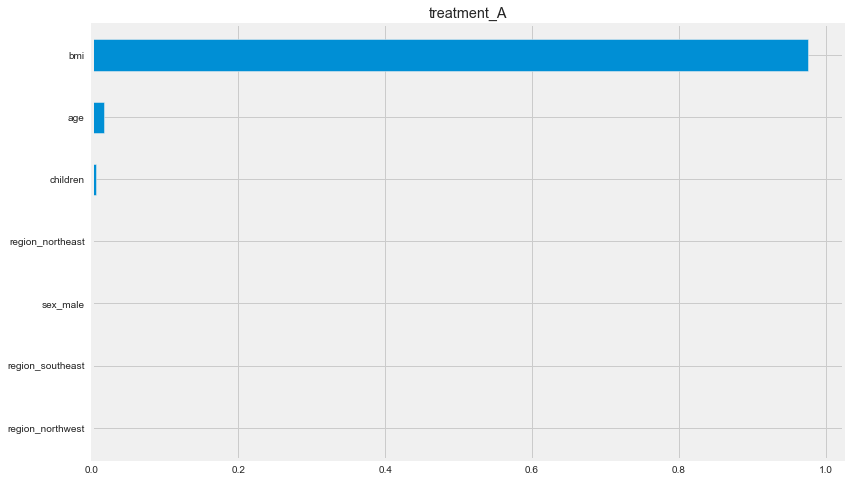

In [98]:
xlearner.plot_importance(X=X, 
                         tau=xlearner_tau, 
                         normalize=True, 
                         method='auto', 
                         features=feature_names)

# Feature Importance (method = permutation)



In [99]:
xlearner.get_importance(X=X, 
                        tau=xlearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)

{'treatment_A': bmi                 2.046096
 age                 0.036631
 children            0.015598
 region_northeast    0.004175
 sex_male            0.002172
 region_southeast    0.000638
 region_northwest    0.000040
 dtype: float64}

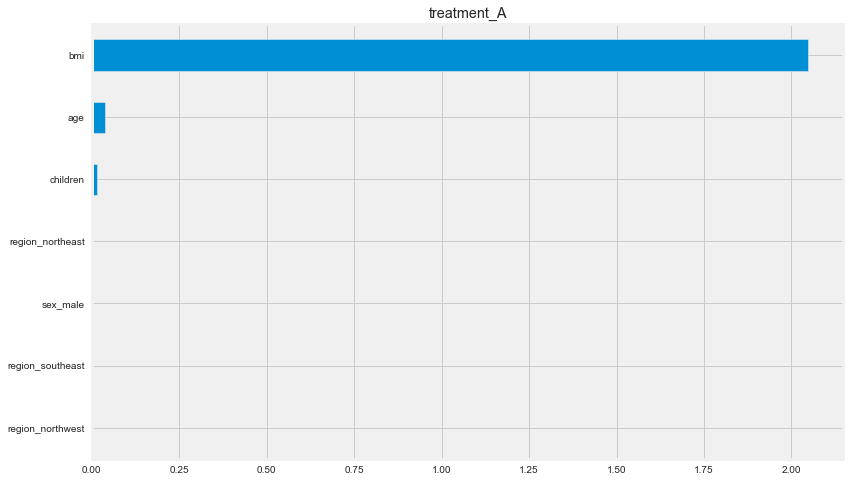

In [100]:
xlearner.plot_importance(X=X, 
                         tau=xlearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

Feature Importance (sklearn.inspection.permutation_importance)


In [101]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, xlearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))

Elapsed time: 0.28574585914611816 seconds


In [102]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)


bmi                 2.046096
age                 0.036631
children            0.015598
region_northeast    0.004175
sex_male            0.002172
region_southeast    0.000638
region_northwest    0.000040
dtype: float64

Text(0.5, 1.0, 'Test Set Permutation Importances')

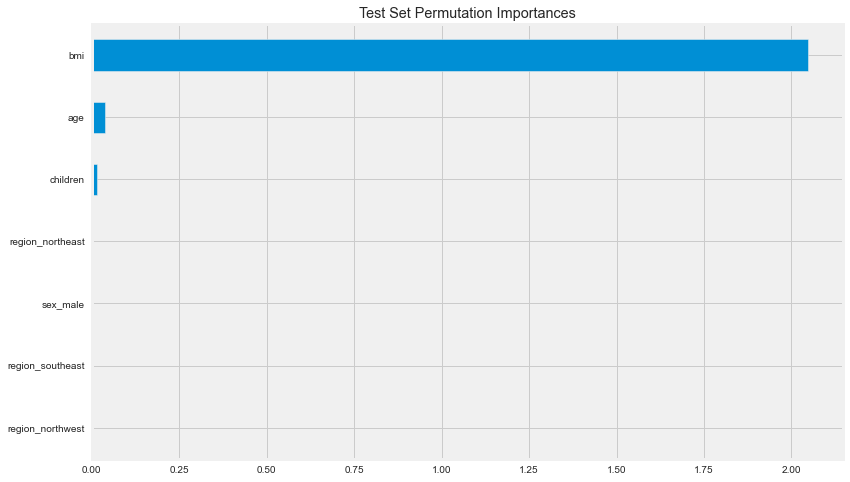

In [103]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

# Shapley Values


In [104]:
shap_xlearner = xlearner.get_shap_values(X=X, tau=xlearner_tau)
shap_xlearner


{'treatment_A': array([[-6.05980853e+02, -9.28241923e+03,  6.43094554e+02, ...,
          7.37023328e+01,  3.15577104e+01, -4.82332070e+01],
        [-4.98105772e+02,  8.45160206e+03, -1.54661492e+02, ...,
          1.77829340e+02, -6.11815452e+00,  7.25671847e+01],
        [ 9.72671727e+02,  8.67795670e+03, -9.71416818e+00, ...,
          2.39579425e+02,  6.45791093e+00,  2.97691533e+01],
        ...,
        [-1.77343621e+02,  9.38182218e+03,  5.02567292e+02, ...,
          2.35504789e+02,  1.70332695e+01,  1.80534023e+01],
        [ 5.47030506e+01, -9.61651902e+03,  8.42633494e+02, ...,
          1.12020601e+02,  4.63531406e+01, -2.17080407e+01],
        [-7.66554198e+02, -7.84005647e+03,  7.06511734e+02, ...,
          6.68754183e+01, -2.68833054e+01, -5.02619323e+00]])}

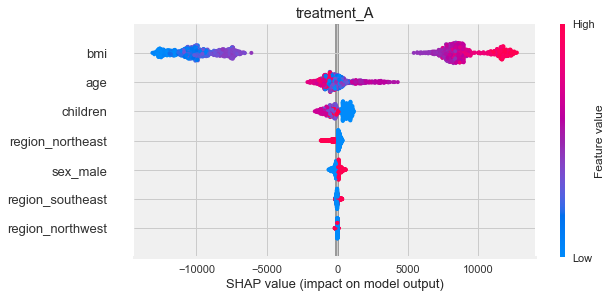

In [105]:
# shap_dict not specified
xlearner.plot_shap_values(X=X, tau=xlearner_tau, features=feature_names)

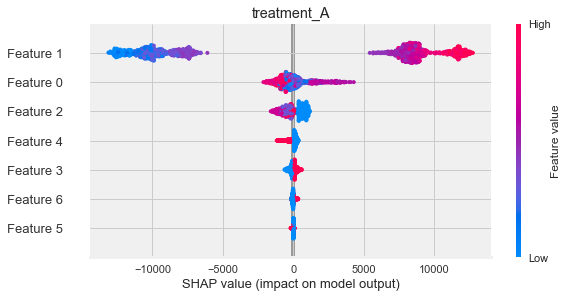

In [106]:
# shap_dict specified
xlearner.plot_shap_values(X=X, shap_dict=shap_xlearner)

# R Learner


In [107]:
rlearner = BaseRRegressor(LGBMRegressor(), control_name='control')
rlearner_tau = rlearner.fit_predict(X, w_multi, y)


# Feature Importance (method = auto)


In [108]:
rlearner.get_importance(X=X, 
                        tau=rlearner_tau, 
                        normalize=True, 
                        method='auto', 
                        features=feature_names)


{'treatment_A': bmi                 0.808768
 age                 0.125817
 children            0.026091
 sex_male            0.019714
 region_southeast    0.009490
 region_northwest    0.005723
 region_northeast    0.004400
 dtype: float64}

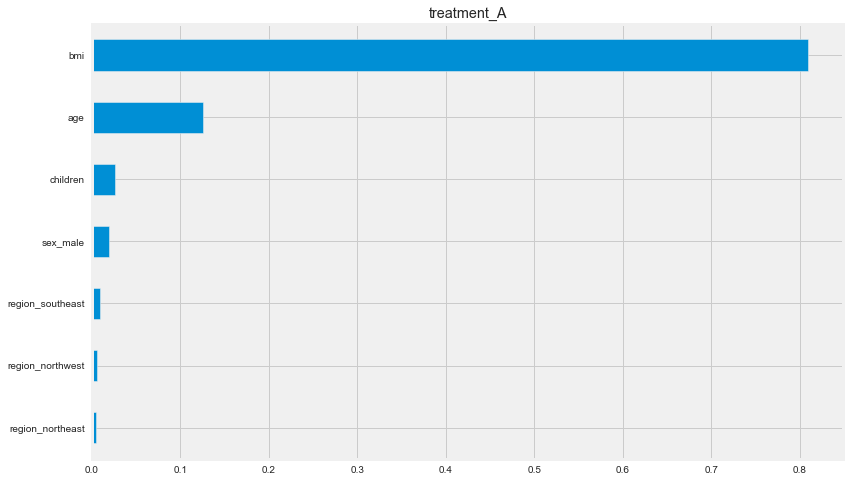

In [109]:
rlearner.plot_importance(X=X, 
                         tau=rlearner_tau, 
                         method='auto', 
                         features=feature_names)

# Feature Importance (method = permutation)


In [110]:
rlearner.get_importance(X=X, 
                        tau=rlearner_tau, 
                        method='permutation', 
                        features=feature_names, 
                        random_state=42)


{'treatment_A': bmi                 1.674842
 age                 0.234999
 children            0.073208
 sex_male            0.043959
 region_southeast    0.026391
 region_northeast    0.011069
 region_northwest    0.010525
 dtype: float64}

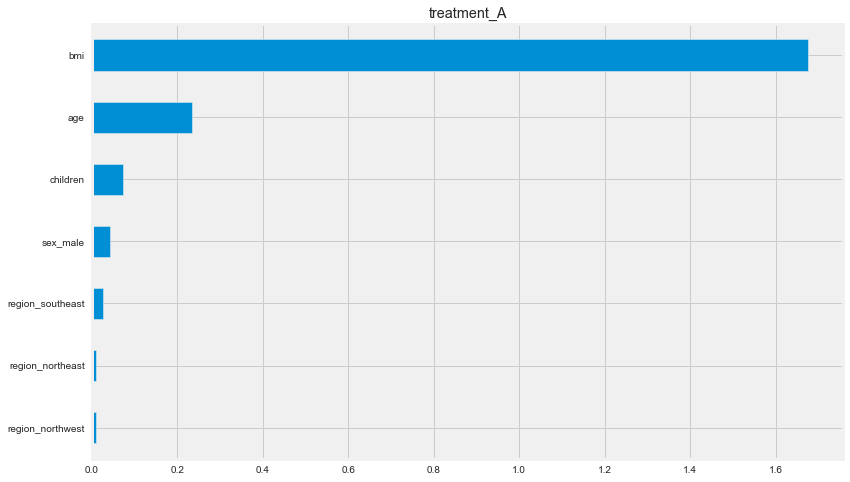

In [111]:
rlearner.plot_importance(X=X, 
                         tau=rlearner_tau, 
                         method='permutation', 
                         features=feature_names, 
                         random_state=42)

Feature Importance (sklearn.inspection.permutation_importance)


In [112]:
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X, rlearner_tau, test_size=0.3, random_state=42)
model_tau_fit = model_tau.fit(X_train, y_train)

perm_imp_test = permutation_importance(
    estimator=model_tau_fit, 
    X=X_test, 
    y=y_test, 
    random_state=42).importances_mean
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)

print("Elapsed time: %s seconds" % (time.time() - start_time))


Elapsed time: 0.25064992904663086 seconds


In [113]:
pd.Series(perm_imp_test, feature_names).sort_values(ascending=False)


bmi                 1.674842
age                 0.234999
children            0.073208
sex_male            0.043959
region_southeast    0.026391
region_northeast    0.011069
region_northwest    0.010525
dtype: float64

Text(0.5, 1.0, 'Test Set Permutation Importances')

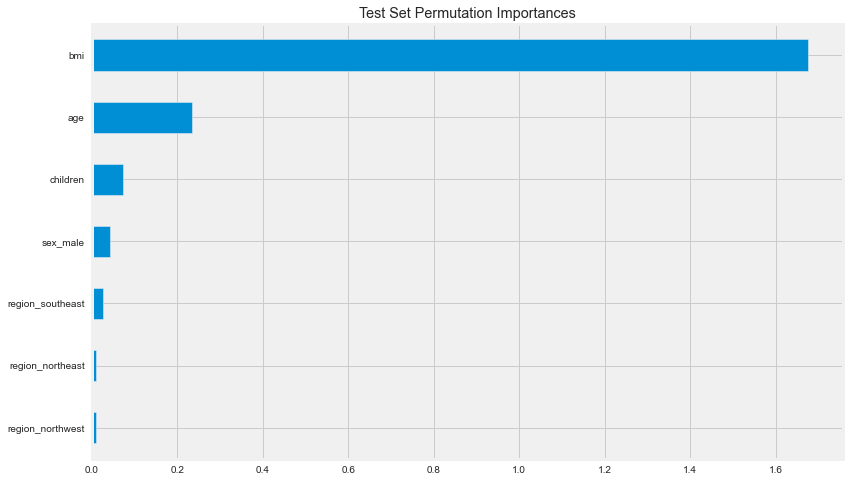

In [114]:
pd.Series(perm_imp_test, feature_names).sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Test Set Permutation Importances')

In [115]:
shap_rlearner = rlearner.get_shap_values(X=X, tau=rlearner_tau)
shap_rlearner

{'treatment_A': array([[  1185.29215908, -11049.97880735,    936.30335733, ...,
           -189.81168728,    115.82577131,   -350.35842378],
        [ -5879.54910414,  -2813.37457655,  -2393.6031744 , ...,
            168.08601129,    257.97469172,     93.21559623],
        [  -855.83061615,  11227.82977659,   2487.99895081, ...,
            131.0204591 ,    838.35368766,    382.21901902],
        ...,
        [  2364.78756531,  15408.77640758,   1730.93149442, ...,
            332.78350107,     79.98749658,    521.79110118],
        [   311.42605971,  -9731.75193218,    258.88884165, ...,
           -284.65124718,    195.13874752,   -310.56110154],
        [  1755.19926601, -10424.7014828 ,   1588.77511762, ...,
            -88.57768928,   -203.98638627,    -77.8625788 ]])}

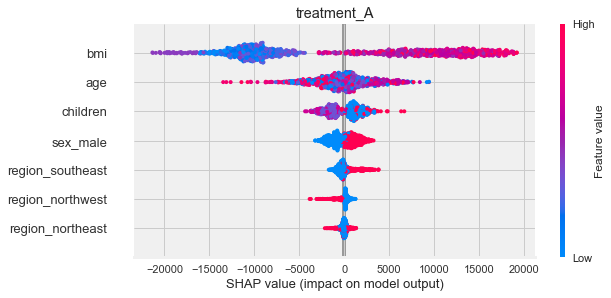

In [116]:
# without providing shap_dict
rlearner.plot_shap_values(X=X, tau=rlearner_tau, features=feature_names)

# Causal intrepretation Analysis Insight

* Using charges as an outcome variable, and smoker as a treatment variable, then feature importance analysis was done to determine the cause and effect of the treatment on the outcome variable.  


* The meta learners s-learner, t-learner, x-learner, and r-learner showed bmi (body mass index) and age were main factors that contribute to higher medical cost. The shap analysis across different meta learners, the higher the body mass index, the higher chance of being charged higer price for medical bills.

# 2) Meta Learners

# Calculate Average Treatment Effect (ATE)

In [117]:
y= df["charges"]

X= df[['age','bmi', 'children','sex_male','region_northeast','region_northwest','region_southeast']]

treatment= df["smoker_yes"]

y, X, treatment = y, X, treatment

In [118]:
# Ready-to-use S-Learner using LinearRegression
learner_s = LRSRegressor()
ate_s = learner_s.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_s)
print('ATE estimate: {:.03f}'.format(ate_s[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_s[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_s[2][0]))



(array([22833.7010214]), array([21687.1147871]), array([23980.2872557]))
ATE estimate: 22833.701
ATE lower bound: 21687.115
ATE upper bound: 23980.287


#### **ATE Insight**: positive ATE indicates if a person is smoker he/she should  expect pay more or higher medical charges. 

In [119]:
# Ready-to-use T-Learner using XGB
learner_t = XGBTRegressor()
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the ready-to-use XGBTRegressor class')
print(ate_t)

# Calling the Base Learner class and feeding in XGB
learner_t = BaseTRegressor(learner=XGBRegressor())
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseTRegressor class and using XGB (same result):')
print(ate_t)

# Calling the Base Learner class and feeding in LinearRegression
learner_t = BaseTRegressor(learner=LinearRegression())
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseTRegressor class and using Linear Regression (different result):')
print(ate_t)

Using the ready-to-use XGBTRegressor class
(array([23311.85629261]), array([22733.21789603]), array([23890.49468919]))

Using the BaseTRegressor class and using XGB (same result):
(array([23311.85629261]), array([22733.21789603]), array([23890.49468919]))

Using the BaseTRegressor class and using Linear Regression (different result):
(array([23383.00737604]), array([22526.5216657]), array([24239.49308637]))


In [120]:
# X Learner with propensity score input
# Calling the Base Learner class and feeding in XGB
learner_x = BaseXRegressor(learner=XGBRegressor())
ate_x = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseXRegressor class and using XGB:')
print(ate_x)

# Calling the Base Learner class and feeding in LinearRegression
learner_x = BaseXRegressor(learner=LinearRegression())
ate_x = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseXRegressor class and using Linear Regression:')
print(ate_x)

Using the BaseXRegressor class and using XGB:
(array([23267.21569348]), array([22718.83013342]), array([23815.60125354]))

Using the BaseXRegressor class and using Linear Regression:
(array([23383.00737604]), array([22526.5216657]), array([24239.49308637]))


In [121]:
# R Learner without propensity score input
# Calling the Base Learner class and feeding in XGB
learner_r = BaseRRegressor(learner=XGBRegressor())
ate_r = learner_r.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseRRegressor class and using XGB without propensity score input:')
print(ate_r)

# Calling the Base Learner class and feeding in LinearRegression
learner_r = BaseRRegressor(learner=LinearRegression())
ate_r = learner_r.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseRRegressor class and using Linear Regression without propensity score input:')
print(ate_r)

Using the BaseRRegressor class and using XGB without propensity score input:
(array([22924.28717452]), array([22880.08046584]), array([22968.4938832]))
Using the BaseRRegressor class and using Linear Regression without propensity score input:
(array([23616.74013428]), array([23581.60043187]), array([23651.87983669]))


# Individual Treatment Effect (ITE/CATE)



In [122]:
# S Learner
learner_s = LRSRegressor()
cate_s = learner_s.fit_predict(X=X, treatment=treatment, y=y)

# T Learner
learner_t = BaseTRegressor(learner=XGBRegressor())
cate_t = learner_t.fit_predict(X=X, treatment=treatment, y=y)



# X Learner without propensity score input
learner_x_no_p = BaseXRegressor(learner=XGBRegressor())
cate_x_no_p = learner_x_no_p.fit_predict(X=X, treatment=treatment, y=y)


# R Learner without propensity score input
learner_r_no_p = BaseRRegressor(learner=XGBRegressor())
cate_r_no_p = learner_r_no_p.fit_predict(X=X, treatment=treatment, y=y)

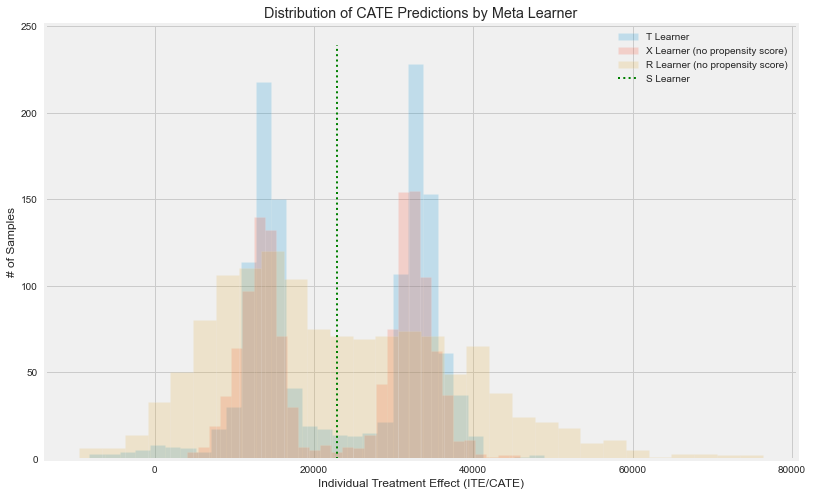

In [123]:
alpha=0.2
bins=30
plt.figure(figsize=(12,8))
plt.hist(cate_t, alpha=alpha, bins=bins, label='T Learner')
plt.hist(cate_x_no_p, alpha=alpha, bins=bins, label='X Learner (no propensity score)')
plt.hist(cate_r_no_p, alpha=alpha, bins=bins, label='R Learner (no propensity score)')
plt.vlines(cate_s[0], 0, plt.axes().get_ylim()[1], label='S Learner',
           linestyles='dotted', colors='green', linewidth=2)
plt.title('Distribution of CATE Predictions by Meta Learner')
plt.xlabel('Individual Treatment Effect (ITE/CATE)')
plt.ylabel('# of Samples')
_=plt.legend()

Insight : the Distribution formed split into 2 region, there is less overlap except the r learner seen to be more spreadout

# DO WHY

In [124]:
# does having a children cause higher medical cost?

In [125]:
import numpy as np
import pandas as pd
import dowhy
from dowhy import CausalModel
import dowhy.datasets
import dowhy.api

warnings.simplefilter(action='ignore')

In [126]:
df.columns


Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'smoker_yes'],
      dtype='object')

In [127]:
# define treatment and target

model=CausalModel(
        data = df,
        treatment=['children'],
        outcome="charges",
        common_causes = ['age','bmi', 'smoker_yes','sex_male','region_northeast','region_northwest','region_southeast'])

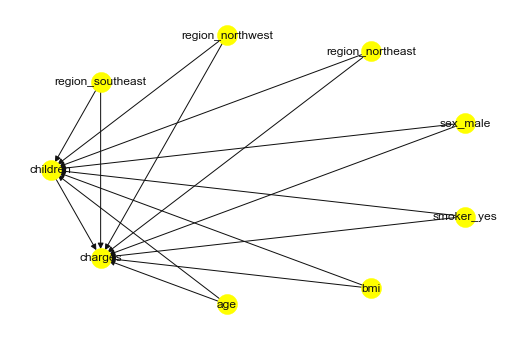

In [128]:
model.view_model(layout="dot")

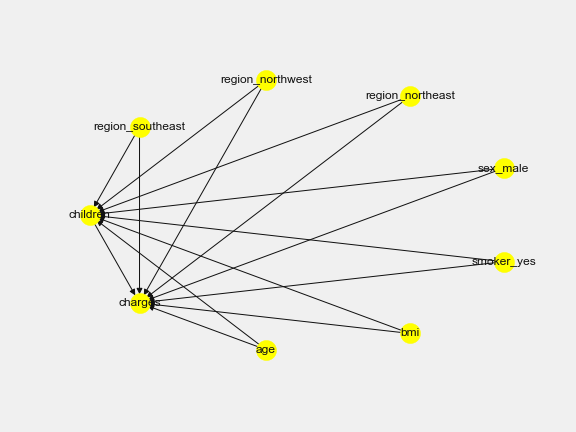

In [129]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [130]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
───────────(Expectation(charges|smoker_yes,bmi,region_northeast,sex_male,age,r
d[children]                                                                   

                                  
egion_northwest,region_southeast))
                                  
Estimand assumption 1, Unconfoundedness: If U→{children} and U→charges then P(charges|children,smoker_yes,bmi,region_northeast,sex_male,age,region_northwest,region_southeast,U) = P(charges|children,smoker_yes,bmi,region_northeast,sex_male,age,region_northwest,region_southeast)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [131]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression", test_significance=True)
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                        
───────────(Expectation(charges|smoker_yes,bmi,region_northeast,sex_male,age,r
d[children]                                                                   

                                  
egion_northwest,region_southeast))
                                  
Estimand assumption 1, Unconfoundedness: If U→{children} and U→charges then P(charges|children,smoker_yes,bmi,region_northeast,sex_male,age,region_northwest,region_southeast,U) = P(charges|children,smoker_yes,bmi,region_northeast,sex_male,age,region_northwest,region_southeast)

## Realized estimand
b: charges~children+smoker_yes+bmi+region_northeast+sex_male+age+region_northwest+region_southeast
Target units: ate

## Estimate
Mean value: 399.2662436954088
p-value: [0.00312582]

Causal Estimate is 399.2662436

#####  Insight from the causal estimate  p-value--> the p-value is less than 0.05 (alpha value) and the causal effect is 399.2 which indicates the effect of having children causes higher medical cost is not by chance. 

In [132]:
X = df[['smoker_yes','age','bmi', 'children','sex_male','region_northeast','region_northwest','region_southeast']]
ATE = dict()

for i in X:
    model = CausalModel(
        data = df,
        treatment = i,
        outcome = 'charges',
        common_causes = list(X.drop(i, axis = 'columns').columns)
    )
    
    identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

    estimate = model.estimate_effect(identified_estimand,
                                     method_name="backdoor.linear_regression",
                                    test_significance = True)
    
    ATE[i] = estimate.value
    print(ATE)

{'smoker_yes': 22833.701021398614}
{'smoker_yes': 22833.701021398614, 'age': 249.7034918515874}
{'smoker_yes': 22833.701021398614, 'age': 249.7034918515874, 'bmi': 283.14342992792854}
{'smoker_yes': 22833.701021398614, 'age': 249.7034918515874, 'bmi': 283.14342992792854, 'children': 399.2662436954088}
{'smoker_yes': 22833.701021398614, 'age': 249.7034918515874, 'bmi': 283.14342992792854, 'children': 399.2662436954088, 'sex_male': 187.52101290309656}
{'smoker_yes': 22833.701021398614, 'age': 249.7034918515874, 'bmi': 283.14342992792854, 'children': 399.2662436954088, 'sex_male': 187.52101290309656, 'region_northeast': 771.9427579639596}
{'smoker_yes': 22833.701021398614, 'age': 249.7034918515874, 'bmi': 283.14342992792854, 'children': 399.2662436954088, 'sex_male': 187.52101290309656, 'region_northeast': 771.9427579639596, 'region_northwest': 375.05818862707747}
{'smoker_yes': 22833.701021398614, 'age': 249.7034918515874, 'bmi': 283.14342992792854, 'children': 399.2662436954088, 'sex_ma

In [133]:
ATE_values = pd.Series(ATE).to_frame()
ATE_values = ATE_values.rename(columns={0: "ATE"})
ATE_values.sort_values(by='ATE',ascending=False)

ATE
smoker_yes        22833.701021
region_northeast    771.942758
children            399.266244
region_northwest    375.058189
bmi                 283.143430
age                 249.703492
sex_male            187.521013
region_southeast     50.607600

In [134]:
# Refuting the estimate with a random common cause

In [135]:
res_random=model.refute_estimate(identified_estimand, causal_estimate, method_name="random_common_cause")
print(res_random)

Refute: Add a random common cause
Estimated effect:399.2662436954088
New effect:49.22482905752045
p value:0.0



#### **Insight**: the random effect has some impact on the causal and effect relationship seen between medical cost and children. 